<a href="https://colab.research.google.com/github/charismaticchiu/Adversarial_Resolution/blob/master/fashion_n_class_loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install adversarial-robustness-toolbox
#!pip install foolbox
#!pip install opencv-python
%tensorflow_version 1.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

     |████████████████████████████████| 491kB 8.7MB/s 
     |████████████████████████████████| 7.1MB 21.0MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
TensorFlow 1.x selected.
Found GPU at: /device:GPU:0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

save_dir = 'drive/My Drive/adv_img/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from PIL import Image  
import numpy as np
import pdb, cv2

def resizeDatasets(orig_dataset, tgt_size):
    #resized_datasets = []
    original_size = orig_dataset.shape[1]
    try:
        channel = orig_dataset.shape[3]
    except:
        channel = 1
    curr_size = original_size 

    #resized_datasets.append(orig_dataset)
    
    resized_datasets = np.ndarray(shape=(orig_dataset.shape[0], tgt_size, tgt_size, channel))
    for i in range(orig_dataset.shape[0]):
        # pdb.set_trace()
        resized_datasets[i,:,:,:] = cv2.resize(orig_dataset[i], (tgt_size, tgt_size)).reshape((tgt_size, tgt_size, channel))
    
    return resized_datasets
def to_categorical(labels, nb_classes=None):
    """
    Convert an array of labels to binary class matrix.
    :param labels: An array of integer labels of shape `(nb_samples,)`
    :type labels: `np.ndarray`
    :param nb_classes: The number of classes (possible labels)
    :type nb_classes: `int`
    :return: A binary matrix representation of `y` in the shape `(nb_samples, nb_classes)`
    :rtype: `np.ndarray`
    """
    labels = np.array(labels, dtype=np.int32)
    if nb_classes is None:
        nb_classes = np.max(labels) + 1
    categorical = np.zeros((labels.shape[0], nb_classes), dtype=np.float32)
    categorical[np.arange(labels.shape[0]), np.squeeze(labels)] = 1
    return categorical

def preprocess(x, y, nb_classes=10, clip_values=None):
    """
    Scales `x` to [0, 1] and converts `y` to class categorical confidences.
    :param x: Data instances.
    :type x: `np.ndarray`
    :param y: Labels.
    :type y: `np.ndarray`
    :param nb_classes: Number of classes in dataset.
    :type nb_classes: `int`
    :param clip_values: Original data range allowed value for features, either one respective scalar or one value per
           feature.
    :type clip_values: `tuple(float, float)` or `tuple(np.ndarray, np.ndarray)`
    :return: Rescaled values of `x`, `y`
    :rtype: `tuple`
    """
    if clip_values is None:
        min_, max_ = np.amin(x), np.amax(x)
    else:
        min_, max_ = clip_values

    normalized_x = (x - min_) / (max_ - min_)
    categorical_y = to_categorical(y, nb_classes)

    return normalized_x, categorical_y


from keras.datasets import fashion_mnist
def load_fashion(nb_classes=10, raw=False):
    """
    Loads Fashion MNIST dataset from `ART_DATA_PATH` or downloads it if necessary.
    :param raw: `True` if no preprocessing should be applied to the data. Otherwise, data is normalized to 1.
    :type raw: `bool`
    :return: `(x_train, y_train), (x_test, y_test), min, max`
    :rtype: `(np.ndarray, np.ndarray), (np.ndarray, np.ndarray), float, float`
    """
    
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    # Add channel axis
    min_, max_ = 0, 255
    if not raw:
        min_, max_ = 0.0, 1.0
        x_train = np.expand_dims(x_train, axis=3)
        x_test = np.expand_dims(x_test, axis=3)
        # pdb.set_trace()
        # custom classes by Ming
        tr_id = np.argwhere(y_train < nb_classes).squeeze()
        te_id = np.argwhere(y_test < nb_classes).squeeze()
        x_train, y_train = x_train[tr_id], y_train[tr_id]
        x_test, y_test = x_test[te_id], y_test[te_id]


        x_train, y_train = preprocess(x_train, y_train, nb_classes=nb_classes)
        x_test, y_test = preprocess(x_test, y_test, nb_classes=nb_classes)

    return (x_train, y_train), (x_test, y_test), min_, max_


Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step
n classes: 2. Pixel size: 12
Train shape: (12000, 28, 28, 1)
Val shape: (2000, 28, 28, 1)


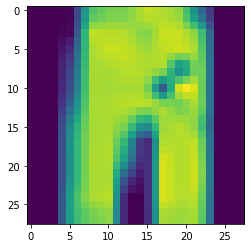






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





375/375 [==============================] - 14s 38ms/step - loss: 0.2284 - acc: 0.9257
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0769 - acc: 0.9717
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0613 - acc: 0.9781
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0583 - acc: 0.9786
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0501 - acc: 0.9828
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0485 - acc: 0.9833
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0486 - acc: 0.9836
Epoch 8/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0477 - acc: 0.9825
Epoch 9/20
375

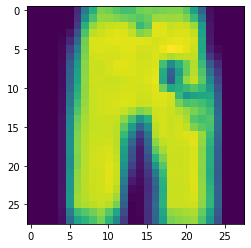

Epoch 1/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2075 - acc: 0.9382
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0601 - acc: 0.9796
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0451 - acc: 0.9840
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0415 - acc: 0.9852
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0419 - acc: 0.9849
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0424 - acc: 0.9845
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0374 - acc: 0.9866
Epoch 8/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0340 - acc: 0.9882
Epoch 9/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0321 - acc: 0.9882
Epoch 10/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0368 - acc: 0.9870
Epoch 11/20
375/375 [============================

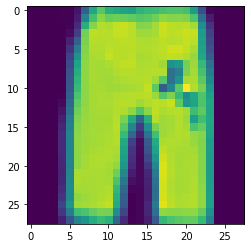

Epoch 1/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2059 - acc: 0.9333
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0609 - acc: 0.9788
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0468 - acc: 0.9836
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0367 - acc: 0.9878
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0339 - acc: 0.9871
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0321 - acc: 0.9889
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0328 - acc: 0.9880
Epoch 8/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0336 - acc: 0.9884
Epoch 9/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0274 - acc: 0.9903
Epoch 10/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0285 - acc: 0.9893
Epoch 11/20
375/375 [============================

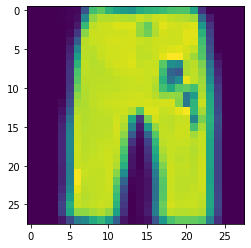

Epoch 1/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2092 - acc: 0.9421
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0540 - acc: 0.9831
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0387 - acc: 0.9863
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0410 - acc: 0.9852
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0342 - acc: 0.9874
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0340 - acc: 0.9862
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0350 - acc: 0.9882
Epoch 8/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0316 - acc: 0.9896
Epoch 9/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0260 - acc: 0.9908
Epoch 10/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0285 - acc: 0.9893
Epoch 11/20
375/375 [============================

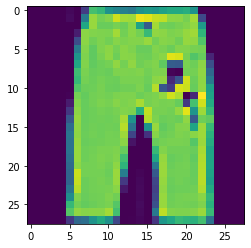

Epoch 1/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1639 - acc: 0.9474
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0484 - acc: 0.9831
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0407 - acc: 0.9860
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0369 - acc: 0.9877
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0328 - acc: 0.9880
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0300 - acc: 0.9898
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0283 - acc: 0.9892
Epoch 8/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0269 - acc: 0.9902
Epoch 9/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0263 - acc: 0.9905
Epoch 10/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0267 - acc: 0.9895
Epoch 11/20
375/375 [============================

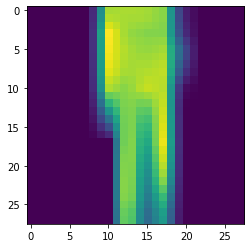

Epoch 1/20
750/750 [==============================] - 4s 6ms/step - loss: 0.5681 - acc: 0.8091
Epoch 2/20
750/750 [==============================] - 3s 5ms/step - loss: 0.3274 - acc: 0.8877
Epoch 3/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2980 - acc: 0.8984
Epoch 4/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2778 - acc: 0.9063
Epoch 5/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2691 - acc: 0.9108
Epoch 6/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2467 - acc: 0.9193
Epoch 7/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2442 - acc: 0.9181
Epoch 8/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2385 - acc: 0.9199
Epoch 9/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2236 - acc: 0.9263
Epoch 10/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2199 - acc: 0.9272
Epoch 11/20
750/750 [============================

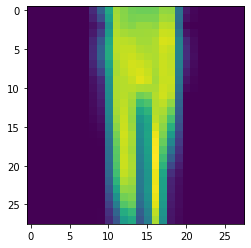

Epoch 1/20
750/750 [==============================] - 4s 6ms/step - loss: 0.5044 - acc: 0.8347
Epoch 2/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2967 - acc: 0.8995
Epoch 3/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2624 - acc: 0.9135
Epoch 4/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2534 - acc: 0.9154
Epoch 5/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2364 - acc: 0.9218
Epoch 6/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2266 - acc: 0.9216
Epoch 7/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2250 - acc: 0.9236
Epoch 8/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2111 - acc: 0.9277
Epoch 9/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2108 - acc: 0.9295
Epoch 10/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1984 - acc: 0.9353
Epoch 11/20
750/750 [============================

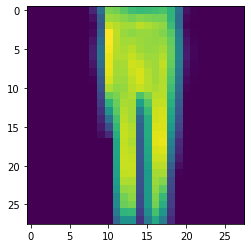

Epoch 1/20
750/750 [==============================] - 4s 6ms/step - loss: 0.5096 - acc: 0.8361
Epoch 2/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2765 - acc: 0.9063
Epoch 3/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2447 - acc: 0.9190
Epoch 4/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2316 - acc: 0.9246
Epoch 5/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2136 - acc: 0.9288
Epoch 6/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2024 - acc: 0.9319
Epoch 7/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1972 - acc: 0.9352
Epoch 8/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1926 - acc: 0.9354
Epoch 9/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1891 - acc: 0.9369
Epoch 10/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1781 - acc: 0.9405
Epoch 11/20
750/750 [============================

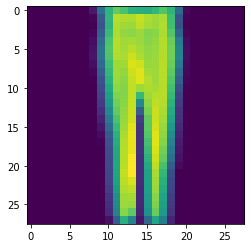

Epoch 1/20
750/750 [==============================] - 5s 6ms/step - loss: 0.4696 - acc: 0.8505
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2500 - acc: 0.9174
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2298 - acc: 0.9231
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2157 - acc: 0.9289
Epoch 5/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2092 - acc: 0.9309
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1990 - acc: 0.9344
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1877 - acc: 0.9379
Epoch 8/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1807 - acc: 0.9399
Epoch 9/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1765 - acc: 0.9421
Epoch 10/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1728 - acc: 0.9428
Epoch 11/20
750/750 [============================

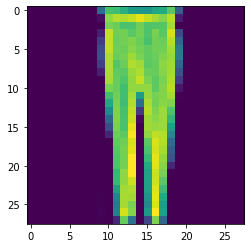

Epoch 1/20
750/750 [==============================] - 5s 6ms/step - loss: 0.4547 - acc: 0.8511
Epoch 2/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2517 - acc: 0.9154
Epoch 3/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2218 - acc: 0.9293
Epoch 4/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2030 - acc: 0.9345
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1960 - acc: 0.9365
Epoch 6/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1878 - acc: 0.9390
Epoch 7/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1830 - acc: 0.9398
Epoch 8/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1710 - acc: 0.9449
Epoch 9/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1717 - acc: 0.9431
Epoch 10/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1659 - acc: 0.9446
Epoch 11/20
750/750 [============================

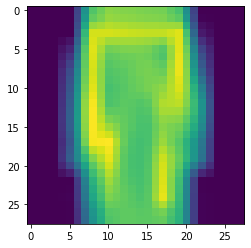

Epoch 1/20
1125/1125 [==============================] - 6s 6ms/step - loss: 0.6750 - acc: 0.7536
Epoch 2/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.4260 - acc: 0.8409
Epoch 3/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3872 - acc: 0.8561
Epoch 4/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3678 - acc: 0.8649
Epoch 5/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3590 - acc: 0.8678
Epoch 6/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3423 - acc: 0.8732
Epoch 7/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3299 - acc: 0.8793
Epoch 8/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3302 - acc: 0.8805
Epoch 9/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3189 - acc: 0.8820
Epoch 10/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3038 - acc: 0.8885
Epoch 11/20
1125/1125 [======

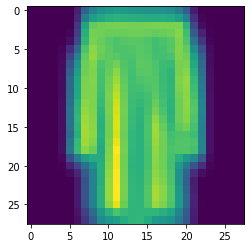

Epoch 1/20
1125/1125 [==============================] - 7s 6ms/step - loss: 0.6554 - acc: 0.7561
Epoch 2/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.4145 - acc: 0.8469
Epoch 3/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3820 - acc: 0.8606
Epoch 4/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3572 - acc: 0.8704
Epoch 5/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3398 - acc: 0.8745
Epoch 6/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3208 - acc: 0.8839
Epoch 7/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3123 - acc: 0.8861
Epoch 8/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3108 - acc: 0.8867
Epoch 9/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2966 - acc: 0.8919
Epoch 10/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2859 - acc: 0.8964
Epoch 11/20
1125/1125 [======

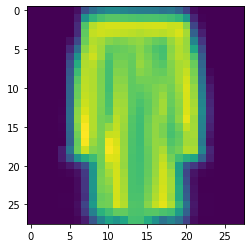

Epoch 1/20
1125/1125 [==============================] - 7s 6ms/step - loss: 0.6315 - acc: 0.7717
Epoch 2/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3885 - acc: 0.8554
Epoch 3/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3542 - acc: 0.8702
Epoch 4/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3252 - acc: 0.8819
Epoch 5/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3108 - acc: 0.8872
Epoch 6/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2986 - acc: 0.8901
Epoch 7/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2892 - acc: 0.8972
Epoch 8/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2801 - acc: 0.8997
Epoch 9/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2695 - acc: 0.9014
Epoch 10/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2652 - acc: 0.9052
Epoch 11/20
1125/1125 [======

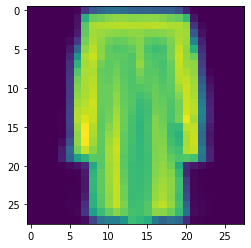

Epoch 1/20
1125/1125 [==============================] - 7s 6ms/step - loss: 0.6164 - acc: 0.7747
Epoch 2/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3754 - acc: 0.8616
Epoch 3/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3469 - acc: 0.8724
Epoch 4/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3227 - acc: 0.8823
Epoch 5/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3041 - acc: 0.8905
Epoch 6/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2877 - acc: 0.8957
Epoch 7/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2762 - acc: 0.8994
Epoch 8/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2675 - acc: 0.9048
Epoch 9/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2549 - acc: 0.9073
Epoch 10/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2511 - acc: 0.9078
Epoch 11/20
1125/1125 [======

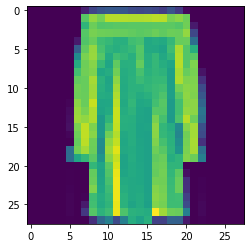

Epoch 1/20
1125/1125 [==============================] - 7s 6ms/step - loss: 0.5862 - acc: 0.7946
Epoch 2/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3481 - acc: 0.8756
Epoch 3/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.3124 - acc: 0.8891
Epoch 4/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2923 - acc: 0.8952
Epoch 5/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2729 - acc: 0.9041
Epoch 6/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2647 - acc: 0.9067
Epoch 7/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2542 - acc: 0.9103
Epoch 8/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2440 - acc: 0.9127
Epoch 9/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2355 - acc: 0.9168
Epoch 10/20
1125/1125 [==============================] - 5s 5ms/step - loss: 0.2290 - acc: 0.9176
Epoch 11/20
1125/1125 [======

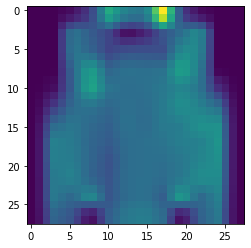

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8832 - acc: 0.6667
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6604 - acc: 0.7475
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6061 - acc: 0.7705
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5750 - acc: 0.7838
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5497 - acc: 0.7933
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5320 - acc: 0.7986
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5162 - acc: 0.8075
Epoch 8/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5028 - acc: 0.8114
Epoch 9/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4930 - acc: 0.8145
Epoch 10/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4805 - acc: 0.8184
Epoch 11/20
1500/1500 [======

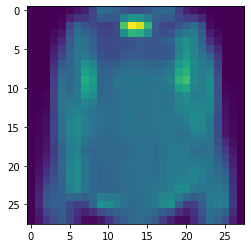

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8434 - acc: 0.6816
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6101 - acc: 0.7649
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5745 - acc: 0.7815
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5391 - acc: 0.7933
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5083 - acc: 0.8076
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4968 - acc: 0.8145
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4815 - acc: 0.8194
Epoch 8/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4680 - acc: 0.8233
Epoch 9/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4580 - acc: 0.8278
Epoch 10/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4453 - acc: 0.8329
Epoch 11/20
1500/1500 [======

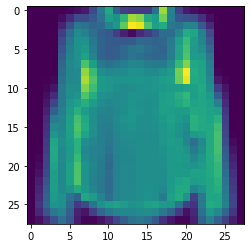

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8447 - acc: 0.6809
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6072 - acc: 0.7689
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5600 - acc: 0.7867
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5270 - acc: 0.8027
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4970 - acc: 0.8138
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4812 - acc: 0.8198
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4662 - acc: 0.8270
Epoch 8/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4566 - acc: 0.8296
Epoch 9/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4344 - acc: 0.8403
Epoch 10/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4277 - acc: 0.8383
Epoch 11/20
1500/1500 [=====

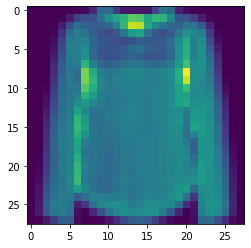

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8163 - acc: 0.6899
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5823 - acc: 0.7746
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5276 - acc: 0.7997
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4996 - acc: 0.8101
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4779 - acc: 0.8204
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4645 - acc: 0.8268
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4464 - acc: 0.8326
Epoch 8/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4369 - acc: 0.8352
Epoch 9/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4313 - acc: 0.8392
Epoch 10/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4188 - acc: 0.8434
Epoch 11/20
1500/1500 [======

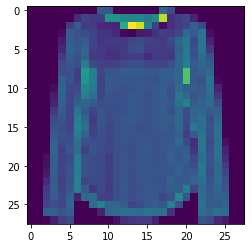

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8072 - acc: 0.6959
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5839 - acc: 0.7767
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5258 - acc: 0.8006
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5012 - acc: 0.8111
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4734 - acc: 0.8247
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4505 - acc: 0.8312
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4352 - acc: 0.8398
Epoch 8/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4185 - acc: 0.8451
Epoch 9/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4084 - acc: 0.8476
Epoch 10/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3988 - acc: 0.8532
Epoch 11/20
1500/1500 [======

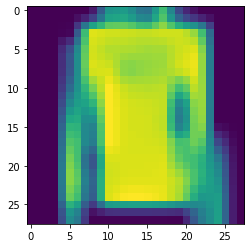

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8695 - acc: 0.6910
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6239 - acc: 0.7716
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5593 - acc: 0.7957
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5347 - acc: 0.8058
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5071 - acc: 0.8166
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4816 - acc: 0.8237
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4660 - acc: 0.8325
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4595 - acc: 0.8347
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4492 - acc: 0.8374
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4339 - acc: 0.8428
Epoch 11/20
1875/1875 [===

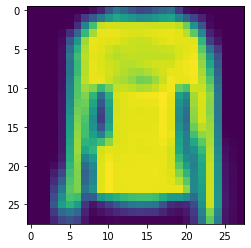

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8016 - acc: 0.7161
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5641 - acc: 0.7920
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5287 - acc: 0.8054
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4938 - acc: 0.8183
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4727 - acc: 0.8279
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4444 - acc: 0.8375
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4336 - acc: 0.8410
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4219 - acc: 0.8466
Epoch 9/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4160 - acc: 0.8460
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4083 - acc: 0.8512
Epoch 11/20
1875/1875 [===

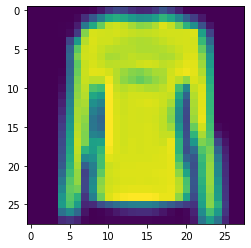

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8230 - acc: 0.7026
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5784 - acc: 0.7848
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5307 - acc: 0.8048
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4887 - acc: 0.8217
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4679 - acc: 0.8286
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4522 - acc: 0.8364
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4366 - acc: 0.8395
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4173 - acc: 0.8481
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4069 - acc: 0.8502
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3951 - acc: 0.8555
Epoch 11/20
1875/1875 [==

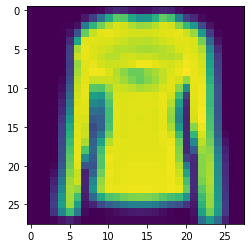

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8162 - acc: 0.7078
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5692 - acc: 0.7901
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5214 - acc: 0.8089
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4974 - acc: 0.8206
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4646 - acc: 0.8337
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4434 - acc: 0.8406
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4260 - acc: 0.8473
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4062 - acc: 0.8530
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4021 - acc: 0.8563
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3908 - acc: 0.8597
Epoch 11/20
1875/1875 [====

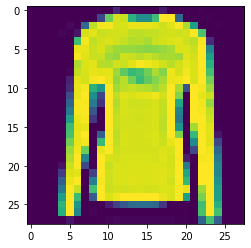

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8034 - acc: 0.7146
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5424 - acc: 0.7980
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4964 - acc: 0.8181
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4623 - acc: 0.8332
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4380 - acc: 0.8422
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4183 - acc: 0.8502
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4053 - acc: 0.8546
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3915 - acc: 0.8576
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3756 - acc: 0.8647
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3744 - acc: 0.8649
Epoch 11/20
1875/1875 [

In [0]:
"""
The script demonstrates a simple example of using ART with Keras. The example train a small model on the MNIST dataset
and creates adversarial examples using the Fast Gradient Sign Method. Here we use the ART classifier to train the model,
it would also be possible to provide a pretrained model to the ART classifier.
The parameters are chosen for reduced computational requirements of the script and not optimised for accuracy.
"""
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

import numpy as np
from numpy.random import seed
seed(1)
tf.set_random_seed(2)
import matplotlib.pyplot as plt
%matplotlib inline
import pdb, time

from art.attacks import FastGradientMethod
from art.classifiers import KerasClassifier
#from art.utils import master_seed
#master_seed(10)
from collections import defaultdict

# Step 1: Load the dataset
classes = [2, 4, 6, 8, 10]
res = {'before': {}, 'after': {}}
for c in classes:
  res['after'][c] = {}
  res['before'][c] = {}

for nb_classes in classes:
  (x_train, y_train), (x_val, y_val), min_pixel_value, max_pixel_value = load_fashion(nb_classes=nb_classes)

  perm1 = np.random.permutation(x_train.shape[0])
  perm2 = np.random.permutation(x_val.shape[0])
  x_train_og = x_train[perm1]
  y_train = y_train[perm1]
  x_val_og = x_val[perm2]
  y_val = y_val[perm2]

  #pixelsize = 14 # pixelsize
  og_size = 28
  pixelsizes = [ 12, 16, 20, 24, 28] # 

  for pixelsize in pixelsizes:
    if pixelsize != og_size:
    
      x_train = resizeDatasets(x_train_og,  pixelsize)
      x_val = resizeDatasets(x_val_og, pixelsize)  
      x_train = resizeDatasets(x_train,  og_size)
      x_val = resizeDatasets(x_val,  og_size)
    else:
      x_train = x_train_og
      x_val = x_val_og
    print("n classes: {}. Pixel size: {}".format(nb_classes, pixelsize))
    print("Train shape: {}".format(x_train.shape))
    print("Val shape: {}".format(x_val.shape))
    plt.imshow(x_train[2,:,:,0])
    plt.show()
    # Step 2: Create the model
    filter_size = og_size
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=1, activation='relu', input_shape=(filter_size, filter_size, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu', input_shape=((filter_size-3+1-2+1), (filter_size-3+1-2+1), 16)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(nb_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=0.0001),
                  metrics=['accuracy'])

    # Step 3: Create the ART classifier
    classifier = KerasClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value), use_logits=False)

    # Step 4: Train the ART classifier
    classifier.fit(x_train, y_train, batch_size=32, nb_epochs=20, shuffle=True)

    # Step 5: Evaluate the ART classifier on benign test examples
    predictions = classifier.predict(x_val)
    accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_val, axis=1)) / len(y_val)
    print('Accuracy on benign test examples: {}%'.format(accuracy * 100))
    res['before'][nb_classes][pixelsize] = accuracy 

    # Step 6: Generate adversarial test examples
    attack = FastGradientMethod(classifier=classifier, eps=0.2)
    x_val_adv = attack.generate(x=x_val)

    # Step 7: Evaluate the ART classifier on adversarial test examples
    predictions = classifier.predict(x_val_adv)
    accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_val, axis=1)) / len(y_val)
    print('Accuracy on adversarial test examples: {}%'.format(accuracy * 100))
    res['after'][nb_classes][pixelsize] = accuracy 
    
    np.savez(save_dir + 'fashion_result',res)

In [0]:

save_dir = 'drive/My Drive/adv_img/'
np.savez(save_dir + 'fashion_result',res)

In [0]:
res

{'after': {2: {12: 0.149, 16: 0.3625, 20: 0.345, 24: 0.4335, 28: 0.467},
  4: {12: 0.1045, 16: 0.093, 20: 0.0985, 24: 0.115, 28: 0.21375},
  6: {12: 0.15783333333333333,
   16: 0.181,
   20: 0.263,
   24: 0.08766666666666667,
   28: 0.22333333333333333},
  8: {12: 0.1805, 16: 0.206, 20: 0.1925, 24: 0.126625, 28: 0.1425},
  10: {12: 0.1237, 16: 0.1125, 20: 0.1265, 24: 0.0953, 28: 0.1189}},
 'before': {2: {12: 0.9835, 16: 0.987, 20: 0.991, 24: 0.992, 28: 0.991},
  4: {12: 0.93775, 16: 0.9455, 20: 0.95125, 24: 0.95625, 28: 0.95475},
  6: {12: 0.9063333333333333,
   16: 0.9166666666666666,
   20: 0.9278333333333333,
   24: 0.9281666666666667,
   28: 0.94},
  8: {12: 0.8445, 16: 0.8665, 20: 0.86525, 24: 0.87175, 28: 0.8825},
  10: {12: 0.864, 16: 0.8747, 20: 0.8844, 24: 0.8909, 28: 0.8958}}}